In [8]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [9]:
df = pd.read_csv('events.csv', error_bad_lines=False)
# Damos formato a la fecha.
df['timestamp_format'] = pd.to_datetime(df['timestamp'])

# Agrego columna fecha
df['date'] = df['timestamp_format'].dt.date
# Agrego columna para los meses.
df['month'] = df['timestamp_format'].dt.month
# Agrego columna dias
df['day'] = df['timestamp_format'].dt.weekday_name
# Agrego columna de horas
df['hour'] = df['timestamp_format'].dt.hour

/home/santiago/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# solo hay datos de new_vs_returning para el evento 'visited_site'
new_vs_returning2 = df.groupby('event')['new_vs_returning'].count().sort_values(ascending=False)
new_vs_returning2

event
visited site         87378
viewed product           0
staticpage               0
searched products        0
search engine hit        0
lead                     0
generic listing          0
conversion               0
checkout                 0
brand listing            0
ad campaign hit          0
Name: new_vs_returning, dtype: int64

Text(0,0.5,'Usuario')

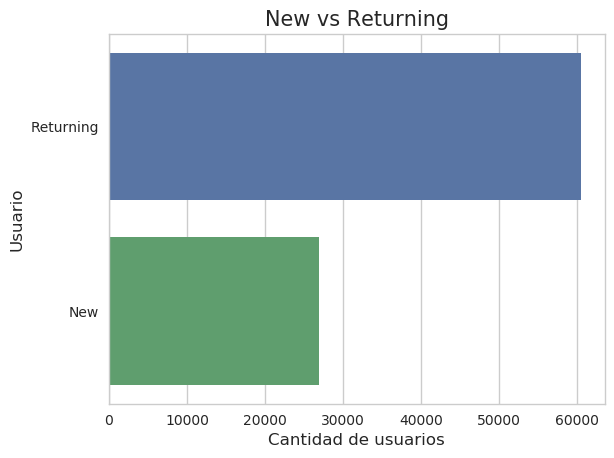

In [11]:
# BarPlot usuarios nuevos vs viejos.
new_vs_returning = df.groupby('new_vs_returning')['event'].count().sort_values(ascending=False)
g = sns.barplot(x=new_vs_returning.values, y=new_vs_returning.index, orient='h')
g.set_title("New vs Returning", fontsize=15)
g.set_xlabel("Cantidad de usuarios", fontsize=12)
g.set_ylabel("Usuario", fontsize=12)

Text(0,0.5,'Channel')

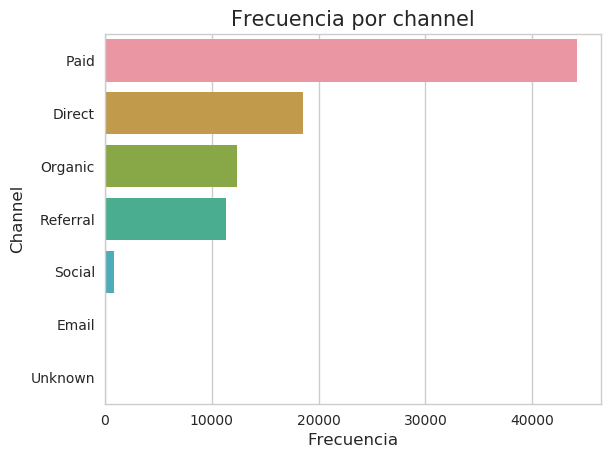

In [12]:
# BarPlot channels
channel = df.groupby('channel')['event'].count().sort_values(ascending=False)
g = sns.barplot(x=channel.values, y=channel.index, orient='h')
g.set_title("Frecuencia por channel", fontsize=15)
g.set_xlabel("Frecuencia", fontsize=12)
g.set_ylabel("Channel", fontsize=12)

In [13]:
# creamos nuevas columnas en escala logaritmica
df["lead_log"] = np.log(projects_2017["pledged"]+1)
projects_2017["goal_log"] = np.log(projects_2017["goal"]+1)

model
iPhone 6 Plus              35
iPhone 6S Plus             31
Samsung Galaxy J7 Prime    26
iPhone 6S                  21
Motorola Moto G4 Plus      20
Name: event, dtype: int64

In [36]:
dfLeadVsConversion = df.loc[(df['event'] == 'lead') | (df['event'] == 'checkout'), :]
dfLeadVsConversionDropMonth6And5 = dfLeadVsConversion.loc[(df['month'] != 6) & (df['month'] != 5)]

Text(0,0.5,'Cantidad')

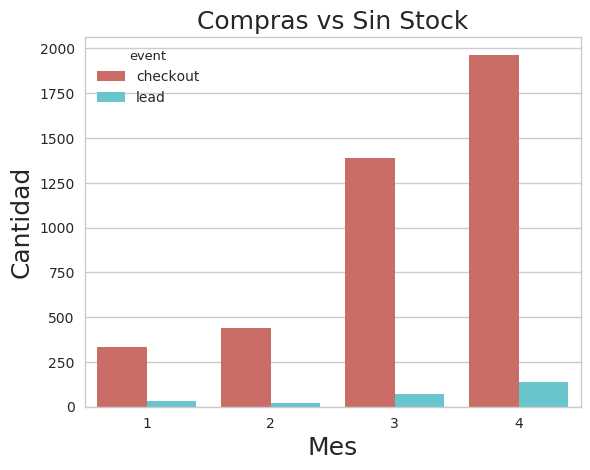

In [37]:
g = sns.countplot(x="month", hue="event", data=dfLeadVsConversionDropMonth6And5, palette="hls")
g.set_title("Compras vs Sin Stock", fontsize=18)
g.set_xlabel("Mes", fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)

In [94]:
# agrego operating system a 
df['operating_system'] = df['operating_system_version'].str.split(n=1).str[0]
df['browser'] = df['browser_version'].str.split(n=1).str[0]
eventosPorOSAndBrowser = df.groupby(['operating_system', 'browser'], as_index=False)['event'].count()
eventosPorOSAndBrowser

,operating_system,browser,event
0,Android,Amazon,3
1,Android,Android,347
2,Android,Chrome,37730
3,Android,Crosswalk,1
4,Android,Facebook,1392
5,Android,Firefox,49
6,Android,Opera,54
7,Android,Pinterest,2
8,Android,Puffin,9
9,Android,Safari,3


In [95]:
minimo = 500
eventosPorOSAndBrowser = eventosPorOSAndBrowser.loc[eventosPorOSAndBrowser['event'] > minimo]

In [96]:
pivoted = pd.pivot_table(eventosPorOSAndBrowser,values='event',columns='browser', \
                         index='operating_system')

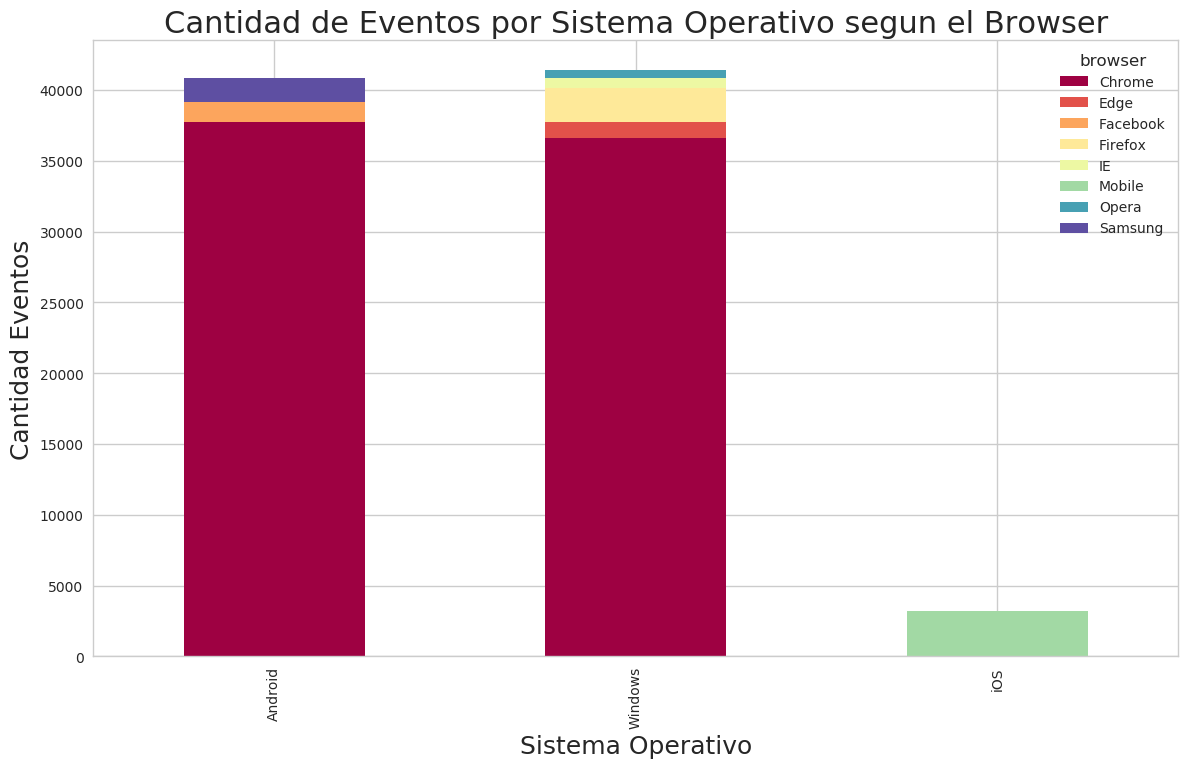

In [97]:
f = plt.figure()
plt.title('Cantidad de Eventos por Sistema Operativo segun el Browser', fontsize=22)
ax = pivoted.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(14,8), ax=f.gca())
ax.set_ylabel('Cantidad Eventos', fontsize=18);
ax.set_xlabel('Sistema Operativo', fontsize=18);
plt.show()

Text(0.5,1,'Campaign Hits per Hour')

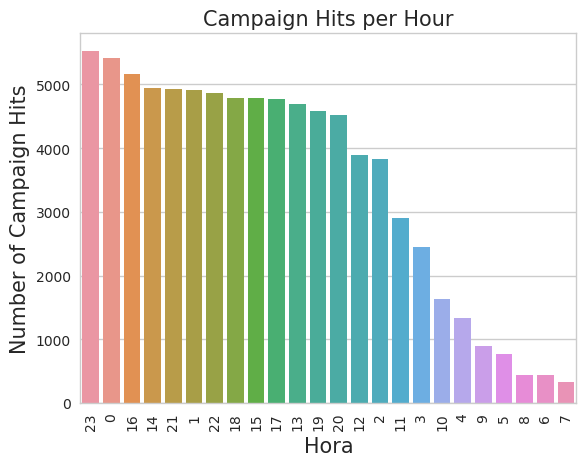

In [99]:
g = sns.countplot(x='hour', data=dfCampaignHit, order=dfCampaignHit['hour'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Hora", fontsize=15)
g.set_ylabel("Number of Campaign Hits", fontsize=15)
g.set_title("Campaign Hits per Hour", fontsize=15)

In [136]:
eventosPorHourAndCampaignSource = df.groupby(['hour', 'campaign_source'], as_index=False)['event'].count()

In [137]:
minimo = 50
eventosPorHourAndCampaignSource = eventosPorHourAndCampaignSource.loc[eventosPorHourAndCampaignSource['event'] > minimo]

In [138]:
pivotedHour = pd.pivot_table(eventosPorHourAndCampaignSource,values='event',columns='campaign_source', \
                         index='hour')

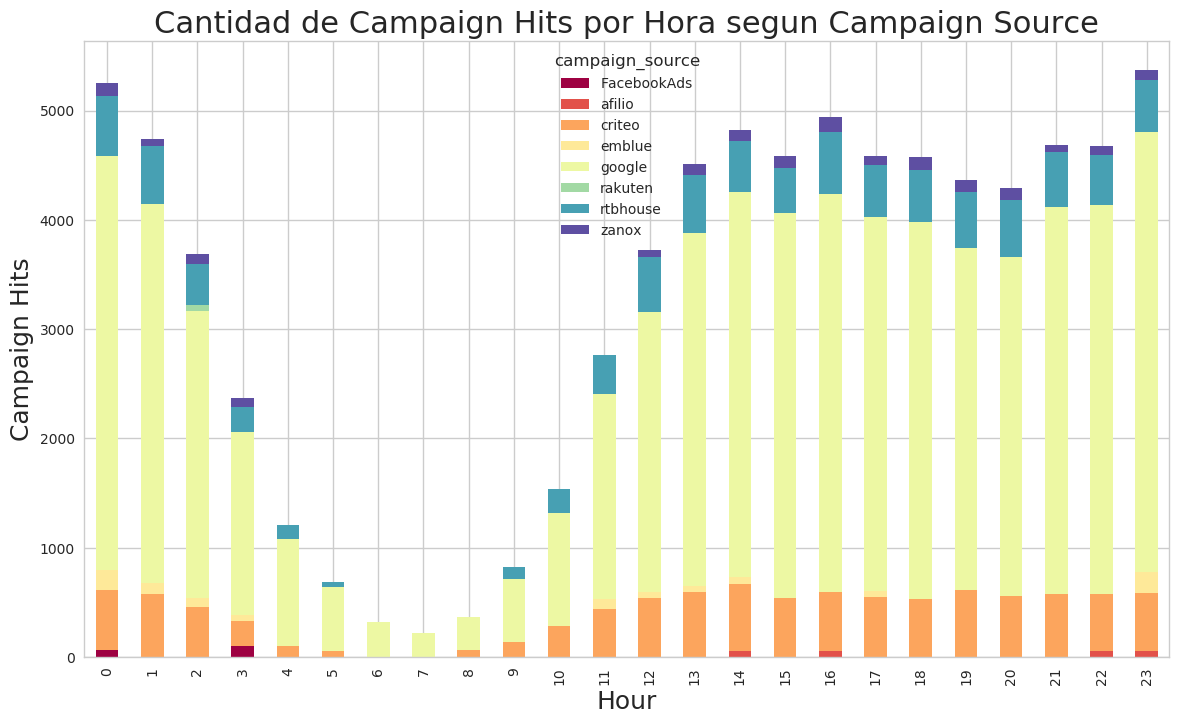

In [139]:
f = plt.figure()
plt.title('Cantidad de Campaign Hits por Hora segun Campaign Source', fontsize=22)
ax = pivotedHour.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(14,8), ax=f.gca())
ax.set_ylabel('Campaign Hits', fontsize=18);
ax.set_xlabel('Hour', fontsize=18);
plt.show()